<a href="https://colab.research.google.com/github/datalabdesign/Gephi-Lite-Conversor/blob/main/Gephi_Lite_Conversor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

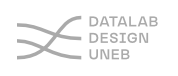

# Conversor de Redes para Gephi Lite

##O que é?
Este notebook foi desenvolvido pelo Professor Elias Bitencourt (Datalab Design/UNEB) como material didático para a disciplina de Métodos Digitais do curso de Design da Universidade do Estado da Bahia (UNEB).  Ele foi criado para viabilizar o uso do Gephi Lite em contextos educacionais e de pesquisa que enfrentam limitações de acesso ou de infraestrutura computacional.

##Qual foi a motivação

Em algumas instituições brasileiras, o uso do **[Gephi](https://gephi.org/)** como ferramenta de análise de redes em contextos educacionais encontra certas restrições. Embora seja uma ferramenta open source, fatores como limitações de hardware, burocracias institucionais para instalação em laboratórios e a falta de acesso dos alunos a equipamentos compatíveis em casa podem dificultar seu uso tanto em sala de aula quanto em atividades remotas.

Nessas condições, o **[Gephi Lite](https://gephi.org/gephi-lite/)**, versão web do Gephi, surge como uma alternativa viável para introduzir a análise de redes ou a análise visual de redes [(Venturini et al., 2021)](https://doi.org/10.1177/20539517211018488) em atividades de ensino ou iniciação científica. Contudo, o Gephi Lite também apresenta limitações, como a incompatibilidade com arquivos de rede no formato GDF, gerados por ferramentas como o [YouTube Data Tools](https://ytdt.digitalmethods.net/) (Rieder, 2015), além de não permitir a exportação das tabelas de nós e arestas com os dados enriquecidos durante as análises.


##O que ele resolve?

Esse notebook procura minimizar algumas dessas limitações, oferecendo uma interface simplificada para converter os arquivos GDF para formatos suportados pelo Gephi Lite (GraphML e GEXF), viabilizando o uso do Gephi Lite como ferramenta didática em contextos com maiores limitações de acesso e infraestrurura.

Além da conversão, o notebook fornece um relatório sobre a estrutura e integridade dos dados da rede, identificando inconsistências em nós e arestas. Esse relatório pode ser usado como recurso didático complementar para visualização de metadados e características da rede, além de validar a conversão.

O script também gera tabelas de nós e arestas em formato CSV, úteis para ensinar a formatação de dados para construção de redes e para acessar dados enriquecidos durante as análises no Gephi Lite, que não permite a exportação dessas tabelas. Isso amplia o acesso a metadados criados durante a análise, como clusters e graus, facilitando tanto o aprendizado quanto a prática da análise de redes em sala de aula.


## Funcionalidades

1. **Conversão Automática**: Converte redes no formato GDF para GraphML ou GEXF, permitindo a análise em plataformas como o Gephi Lite.

2. **Relatório de Rede**: Gera um relatório detalhado com informações essenciais sobre a rede, incluindo:
   - Quantidade de nós e arestas
   - Tipo de rede (dirigida ou não dirigida)
   - Exemplo de um nó e de uma aresta da rede
   - Atributos dos nós e arestas para facilitar a análise e verificação

3. **Verificação de Inconsistências**: Analisa e diagnostica possíveis inconsistências na rede, como nós isolados, arestas duplicadas, direção incorreta e atributos incompletos.

4. **Exportação de Tabelas**: Gera tabelas em CSV de nós e arestas, facilitando a visualização, manipulação e análise dos dados em outras ferramentas.

## Possibilidades de Uso

Este notebook foi projetado para:

- **Professores e Estudantes**: Fornece uma ferramenta de conversão e análise que permite explorar a estrutura da rede, identificar inconsistências e visualizar atributos em tabelas, promovendo um aprendizado prático em análise de redes.
- **Pesquisadores**: Facilita a exploração e manipulação de redes em ferramentas como o Gephi Lite, fornecendo dados exportáveis para análises adicionais fora do ambiente de rede.
- **Análise Didática e Criação de Redes**: As tabelas geradas permitem ensinar a criação e estrutura da rede, facilitando a construção de grafos a partir de dados CSV.

## Passo a Passo para Executar

1. **Executar o Notebook**:
   - Execute cada célula do notebook para ativar as funcionalidades.

2. **Selecionar Formato de Saída**:
   - Escolha entre `GraphML` e `GEXF` no menu suspenso:
     - **GEXF** é ideal para redes temporais ou dinâmicas.
     - **GraphML** é recomendado para redes complexas e análises no Gephi Lite.

3. **Carregar o Arquivo de Rede**:
   - Clique em `Selecionar Arquivo` e faça upload do arquivo no formato GDF.

4. **Conversão e Análise**:
   - O notebook converte o arquivo para o formato selecionado e gera um relatório com um diagnóstico da rede, indicando possíveis inconsistências para revisão.

5. **Download dos Arquivos**:
   - Baixe o arquivo convertido no formato selecionado (GraphML ou GEXF), o relatório de rede e as tabelas de nós e arestas em CSV.


###Como citar
Bitencourt, E. (2024). *Gephi Lite Conversor* (Versão 1.0) [Software].
Datalab Design, Universidade do Estado da Bahia - UNEB, Salvador, Brasil.
https://github.com/datalabdesign/Gephi-Lite-Conversor



.


In [3]:
# @title Gephi Lite Conversor
# @markdown <p>Execute a célula, selecione o arquivo GDF que deseja converter e o tipo de extensão final desejada.<br><br></p>* <b>GEXF:</b> Escolha GEXF se você está focado em visualizar a rede no Gephi completo, especialmente se precisa de suporte para redes dinâmicas ou temporais.<br><br><b>* GraphML:</b> Escolha GraphML se precisa de um formato mais versátil e extensível para uso em diversas plataformas de análise de redes. Esse formato é útil para redes com atributos complexos e para análises exploratórias com o <b>Gephi Lite</b>.

import pandas as pd
import networkx as nx
from google.colab import files
import os
import ipywidgets as widgets
from IPython.display import display, clear_output
import random

# Função para carregar e detectar o formato do arquivo
def load_graph_from_file(file_path):
    """
    Carrega um arquivo de rede e detecta automaticamente o formato (GDF, GEXF ou GraphML).

    :param file_path: Caminho para o arquivo de rede.
    :return: Objeto Graph do NetworkX.
    """
    extension = os.path.splitext(file_path)[-1].lower()
    if extension == '.gdf':
        return load_gdf(file_path)
    elif extension == '.gexf':
        return nx.read_gexf(file_path)
    elif extension == '.graphml':
        return nx.read_graphml(file_path)
    else:
        raise ValueError("Formato de arquivo não suportado. Use GDF, GEXF ou GraphML.")

# Função para converter GDF em um objeto NetworkX
def load_gdf(gdf_file_path):
    """
    Converte um arquivo GDF em um objeto Graph do NetworkX, removendo tipos de dados dos nomes das colunas.

    :param gdf_file_path: Caminho para o arquivo GDF.
    :return: Objeto Graph do NetworkX, DataFrames de nós e arestas.
    """
    with open(gdf_file_path, 'r') as file:
        lines = file.readlines()

    node_def_line_candidates = [i for i, line in enumerate(lines) if 'nodedef>' in line]
    if not node_def_line_candidates:
        raise ValueError("A seção de nós (nodedef) não foi encontrada no arquivo GDF.")
    node_def_line = node_def_line_candidates[0]
    nodes_start = node_def_line + 1

    edges_start = None
    for i, line in enumerate(lines):
        if 'edgedef>' in line:
            edges_start = i + 1
            break
    if edges_start is None:
        raise ValueError("A seção de arestas (edgedef) não foi encontrada no arquivo GDF.")

    node_columns = lines[node_def_line].strip().replace('nodedef>', '').split(',')
    node_columns = [col.split(' ')[0] for col in node_columns]

    nodes_data = [line.strip().split(',') for line in lines[nodes_start:edges_start - 1]]
    nodes_df = pd.DataFrame(nodes_data, columns=node_columns)

    edge_columns = lines[edges_start - 1].strip().replace('edgedef>', '').split(',')
    edge_columns = [col.split(' ')[0] for col in edge_columns]

    edges_data = [line.strip().split(',') for line in lines[edges_start:]]
    edges_df = pd.DataFrame(edges_data, columns=edge_columns)

    G = nx.Graph()
    node_id_column = node_columns[0]
    for _, row in nodes_df.iterrows():
        G.add_node(row[node_id_column], **row.to_dict())

    source_column = edge_columns[0]
    target_column = edge_columns[1]
    for _, row in edges_df.iterrows():
        G.add_edge(row[source_column], row[target_column], **{col: row[col] for col in edge_columns if col not in [source_column, target_column]})

    return G, nodes_df, edges_df

# Função para gerar e salvar relatório com verificações de inconsistências
# Função para gerar e salvar relatório com verificações de inconsistências
def generate_report(G, original_file_path, output_format, nodes_df, edges_df, max_line_length=80):
    """
    Gera um relatório detalhado da rede, incluindo inconsistências, e salva como texto.

    :param G: Objeto Graph do NetworkX.
    :param original_file_path: Caminho para o arquivo original.
    :param output_format: Formato de saída (GraphML ou GEXF).
    :param nodes_df: DataFrame dos nós.
    :param edges_df: DataFrame das arestas.
    :param max_line_length: Comprimento máximo para quebra de linha dos atributos.
    :return: Caminho para o relatório em texto e para os arquivos CSV de nós e arestas.
    """
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    is_directed = nx.is_directed(G)
    graph_type = "Dirigida" if is_directed else "Não dirigida"

    nodes = list(G.nodes(data=True))
    edges = list(G.edges(data=True))
    random_node = random.choice(nodes)
    random_edge = random.choice(edges)

    def format_attributes(attributes):
        formatted = ""
        line = ""
        for attr in attributes:
            if len(line) + len(attr) + 2 > max_line_length:
                formatted += line.rstrip(", ") + "\n" + " " * 20
                line = attr + ", "
            else:
                line += attr + ", "
        formatted += line.rstrip(", ")
        return formatted

    node_attributes = format_attributes(list(random_node[1].keys())) if random_node[1] else "Sem atributos"
    edge_attributes = format_attributes(list(random_edge[2].keys())) if random_edge[2] else "Sem atributos"

    inconsistencies = []
    isolated_nodes = [node for node in G.nodes if G.degree(node) == 0]
    if isolated_nodes:
        inconsistencies.append(f"Nós isolados detectados: {len(isolated_nodes)}")

    if not isinstance(G, nx.MultiGraph) and not isinstance(G, nx.MultiDiGraph):
        duplicate_edges = [edge for edge in G.edges if G.number_of_edges(*edge) > 1]
        if duplicate_edges:
            inconsistencies.append(f"Arestas duplicadas detectadas: {len(duplicate_edges)}")

    directed_inconsistencies = []
    if is_directed:
        directed_inconsistencies = [(u, v) for u, v in G.edges if (v, u) in G.edges and G[u][v] != G[v][u]]
        if directed_inconsistencies:
            inconsistencies.append(f"Inconsistências de direção detectadas: {len(directed_inconsistencies)}")

    # Coleta de inconsistências em atributos de nós e arestas
    node_inconsistencies = {}
    for node, data in G.nodes(data=True):
        for key, value in data.items():
            if value is None or value == '':
                if key not in node_inconsistencies:
                    node_inconsistencies[key] = []
                node_inconsistencies[key].append(node)

    edge_inconsistencies = {}
    for u, v, data in G.edges(data=True):
        for key, value in data.items():
            if value is None or value == '':
                if key not in edge_inconsistencies:
                    edge_inconsistencies[key] = []
                edge_inconsistencies[key].append((u, v))

    # Formatação do relatório de inconsistências
    inconsistency_report = "\nInconsistências Encontradas:\n"
    inconsistency_report += f"- Nós isolados: {len(isolated_nodes)}\n" if isolated_nodes else "- Nenhum nó isolado encontrado.\n"
    inconsistency_report += f"- Arestas duplicadas: {len(duplicate_edges)}\n" if duplicate_edges else "- Nenhuma aresta duplicada encontrada.\n"
    inconsistency_report += f"- Inconsistências de direção: {len(directed_inconsistencies)}\n" if directed_inconsistencies else "- Nenhuma inconsistência de direção encontrada.\n"

    # Inconsistências nos atributos dos nós
    if node_inconsistencies:
        inconsistency_report += "\nInconsistências dos Nós:\n"
        for attr, nodes_with_issues in node_inconsistencies.items():
            inconsistency_report += f"  - Atributo '{attr}': {len(nodes_with_issues)} nós com valor vazio\n"
    else:
        inconsistency_report += "- Nenhuma inconsistência nos atributos dos nós.\n"

    # Inconsistências nos atributos das arestas
    if edge_inconsistencies:
        inconsistency_report += "\nInconsistências das Arestas:\n"
        for attr, edges_with_issues in edge_inconsistencies.items():
            inconsistency_report += f"  - Atributo '{attr}': {len(edges_with_issues)} arestas com valor vazio\n"
    else:
        inconsistency_report += "- Nenhuma inconsistência nos atributos das arestas.\n"

    report_content = (
        "\n\nRelatório da Rede - Gephi Lite Conversor\n\n"
        "Quantidade de Nós: {}\n"
        "Quantidade de Arestas: {}\n"
        "Tipo da Rede: {}\n"
        "Formato de Saída: {}\n\n"
        "Exemplo de Nó: {}\n"
        "Exemplo de Aresta: {} - {}\n\n"
        "Atributos dos Nós: {}\n\n"
        "Atributos das Arestas: {}\n\n"
        "{}\n\n"
        "Como citar:\n"
        "Bitencourt, E. (2024). *Gephi Lite Conversor* (Versão 1.0) [Software].\n"
        "Datalab Design, Universidade do Estado da Bahia - UNEB, Salvador, Brasil.\n"
        "https://github.com/datalabdesign/Gephi-Lite-Conversor\n"
    ).format(
        num_nodes,
        num_edges,
        graph_type,
        output_format.upper(),
        random_node[0],
        random_edge[0],
        random_edge[1],
        node_attributes,
        edge_attributes,
        inconsistency_report
    )

    print(report_content)

    report_file = original_file_path.replace(os.path.splitext(original_file_path)[-1], '_report.txt')
    with open(report_file, 'w') as file:
        file.write(report_content)

    print("Relatório salvo no diretório:", report_file)

    nodes_csv_file = original_file_path.replace(os.path.splitext(original_file_path)[-1], '_nodes.csv')
    edges_csv_file = original_file_path.replace(os.path.splitext(original_file_path)[-1], '_edges.csv')
    nodes_df.to_csv(nodes_csv_file, index=False)
    edges_df.to_csv(edges_csv_file, index=False)

    print("Arquivos CSV de nós e arestas salvos no diretório:", nodes_csv_file, edges_csv_file)

    return report_file, nodes_csv_file, edges_csv_file



# Função para converter e salvar o grafo
def convert_graph_to_format(G, original_file_path, output_format='graphml', nodes_df=None, edges_df=None):
    output_file = original_file_path.replace(os.path.splitext(original_file_path)[-1], f'.{output_format}')
    if output_format == 'graphml':
        nx.write_graphml(G, output_file)
    elif output_format == 'gexf':
        nx.write_gexf(G, output_file)
    else:
        raise ValueError("Formato de saída inválido. Escolha 'graphml' ou 'gexf'.")

    report_file, nodes_csv_file, edges_csv_file = generate_report(G, original_file_path, output_format, nodes_df, edges_df)
    return output_file, report_file, nodes_csv_file, edges_csv_file

# Função de upload e conversão
def upload_and_convert(output_format='graphml'):
    clear_output()
    uploaded = files.upload()
    for filename in uploaded.keys():
        G, nodes_df, edges_df = load_graph_from_file(filename)
        converted_file, report_file, nodes_csv_file, edges_csv_file = convert_graph_to_format(G, filename, output_format=output_format, nodes_df=nodes_df, edges_df=edges_df)
        files.download(converted_file)
        files.download(report_file)
        files.download(nodes_csv_file)
        files.download(edges_csv_file)

output_format_dropdown = widgets.Dropdown(
    options=['graphml', 'gexf'],
    value='graphml',
    description='Converter p/:',
    disabled=False,
)

upload_button = widgets.Button(
    description="Selecionar Arquivo",
    button_style='success',
    icon='upload'
)

upload_button.on_click(lambda b: upload_and_convert(output_format=output_format_dropdown.value))

display(output_format_dropdown, upload_button)


Dropdown(description='Converter p/:', options=('graphml', 'gexf'), value='graphml')

Button(button_style='success', description='Selecionar Arquivo', icon='upload', style=ButtonStyle())